# Figure 3 - Probability of short-term and prolonged GMST reduction

This notebook includes the code to plot Figure 3 - the probabilities of short-term and prolonged GMST reduction greater than the temperature thresholds.

---------------

Written by May Chim

Last updated: 26 July 2024

---------------

## Import packages and figure adjustments

In [1]:
import palettable
from matplotlib.patches import FancyArrowPatch
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import matplotlib.ticker as ticker
import matplotlib.patches as patches

In [2]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['legend.edgecolor']='black'
plt.rcParams['axes.linewidth']='0.8'
plt.rcParams['xtick.bottom']= 'True'
plt.rcParams['ytick.left']= 'True'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['xtick.major.size']='3.5'
plt.rcParams['ytick.major.size']='3.5'
plt.rcParams['xtick.major.width']='0.8'
plt.rcParams['ytick.major.width']='0.8'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.bbox']='tight'

plt.rc('font', size=16) # controls default text sizes          
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title

## Read data

In [3]:
# Read in FaIR simulation results

# Directory of data files
os.chdir('<path-to-directory-of-data>')

df_occurrence = pd.read_csv('table_prob_occurrence.csv')
df_prolonged = pd.read_csv('table_prob_prolonged.csv', sep='\t')

## Functions to calculate short-term and prolonged probability

In [4]:
# The results of the probability calculation are output in 'table_prob_occurrence.csv' and 'table_prob_prolonged.csv'.
# Datasets needed for the calculation
#df2 = xr.open_dataset('stochastic_volcanoes_stochastic_climate.nc')
#dn_internal = xr.open_dataset('no_future_volcanoes_stochastic_climate.nc') 

def calc_prob_short_term(df, ssp):
    
    # Function to calculate the probability of short term GMST reduction greater than temperature thresholds
    #
    # Note: 
    # Indicate df (df2 or dn_internal) and ssp index (0 or 1 or 2) when calling the function
    # df2: with stochastic volcanic forcing and internal variability,
    # dn_internal: with internal variability and no stochastic forincg)
    # ssp index:
    # 0: ssp119, 1:ssp245, 2:ssp585
    
    
    thres = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]
    count_occurrences = []
    
    for threshold in thres:
        
        print('Threshold: -', threshold)
        total_count_future = []
        
        for future in range(1000):
            
            count_num = []
            
            for t in range(86):
                
                count = 0
                
                if ((df.temperature[165+t+1,ssp,future]-df.temperature[165+t,ssp,future]) < -threshold): 
                    count = count + 1
                    
                count_num.append(count)
                
            count_per_year = np.sum(count_num)
            total_count_future.append(count_per_year)

        count_scenario = sum(1 for x in total_count_future if x > 0)
        print('Probability of having a volcanic future with occurrence of >', threshold,'ºC', count_scenario/ 1000 * 100)
        
        count_occurrences.append(count_scenario / 1000 * 100)
        
    return count_occurrences


def calc_prob_prolonged(df, ssp):
    
    # Function to calculate the probability of prolonged GMST reduction greater than temperature thresholds
    #
    # Note: 
    # Indicate df (df2 or dn_internal) and ssp index (0 or 1 or 2) when calling the function
    # df2: with stochastic volcanic forcing and internal variability,
    # dn_internal: with internal variability and no stochastic forincg)
    # ssp index:
    # 0: ssp119, 1:ssp245, 2:ssp585
    
    thres = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]
    prob_occurrences = []

    for threshold in thres:
        print('Threshold: -', threshold)

        total_count_future = []

        for future in range(1000):
            count_num = []
            for t in range(86):
                
                count = 0
                
                t1 = df.temperature[165+t,ssp,future]
                t2 = df.temperature[165+t+1,ssp,future]
                mean = (t1+t2)/2

                if (mean < -threshold) & (t1 < -0.1) & (t2 < -0.1):
                    count = count + 1
                    
                count_num.append(count)
                
            count_per_year = np.sum(count_num)
            total_count_future.append(count_per_year)

        count_each_scenario = sum(1 for x in total_count_future if x > 0)
        prob_occurrences.append(count_each_scenario / 1000 * 100)
        print('Probability of prolonged cooling of', threshold,'ºC', prob_occurrences)
        
    return prob_occurrences

## Figure 3a (Probability of short-term GMST reduction)

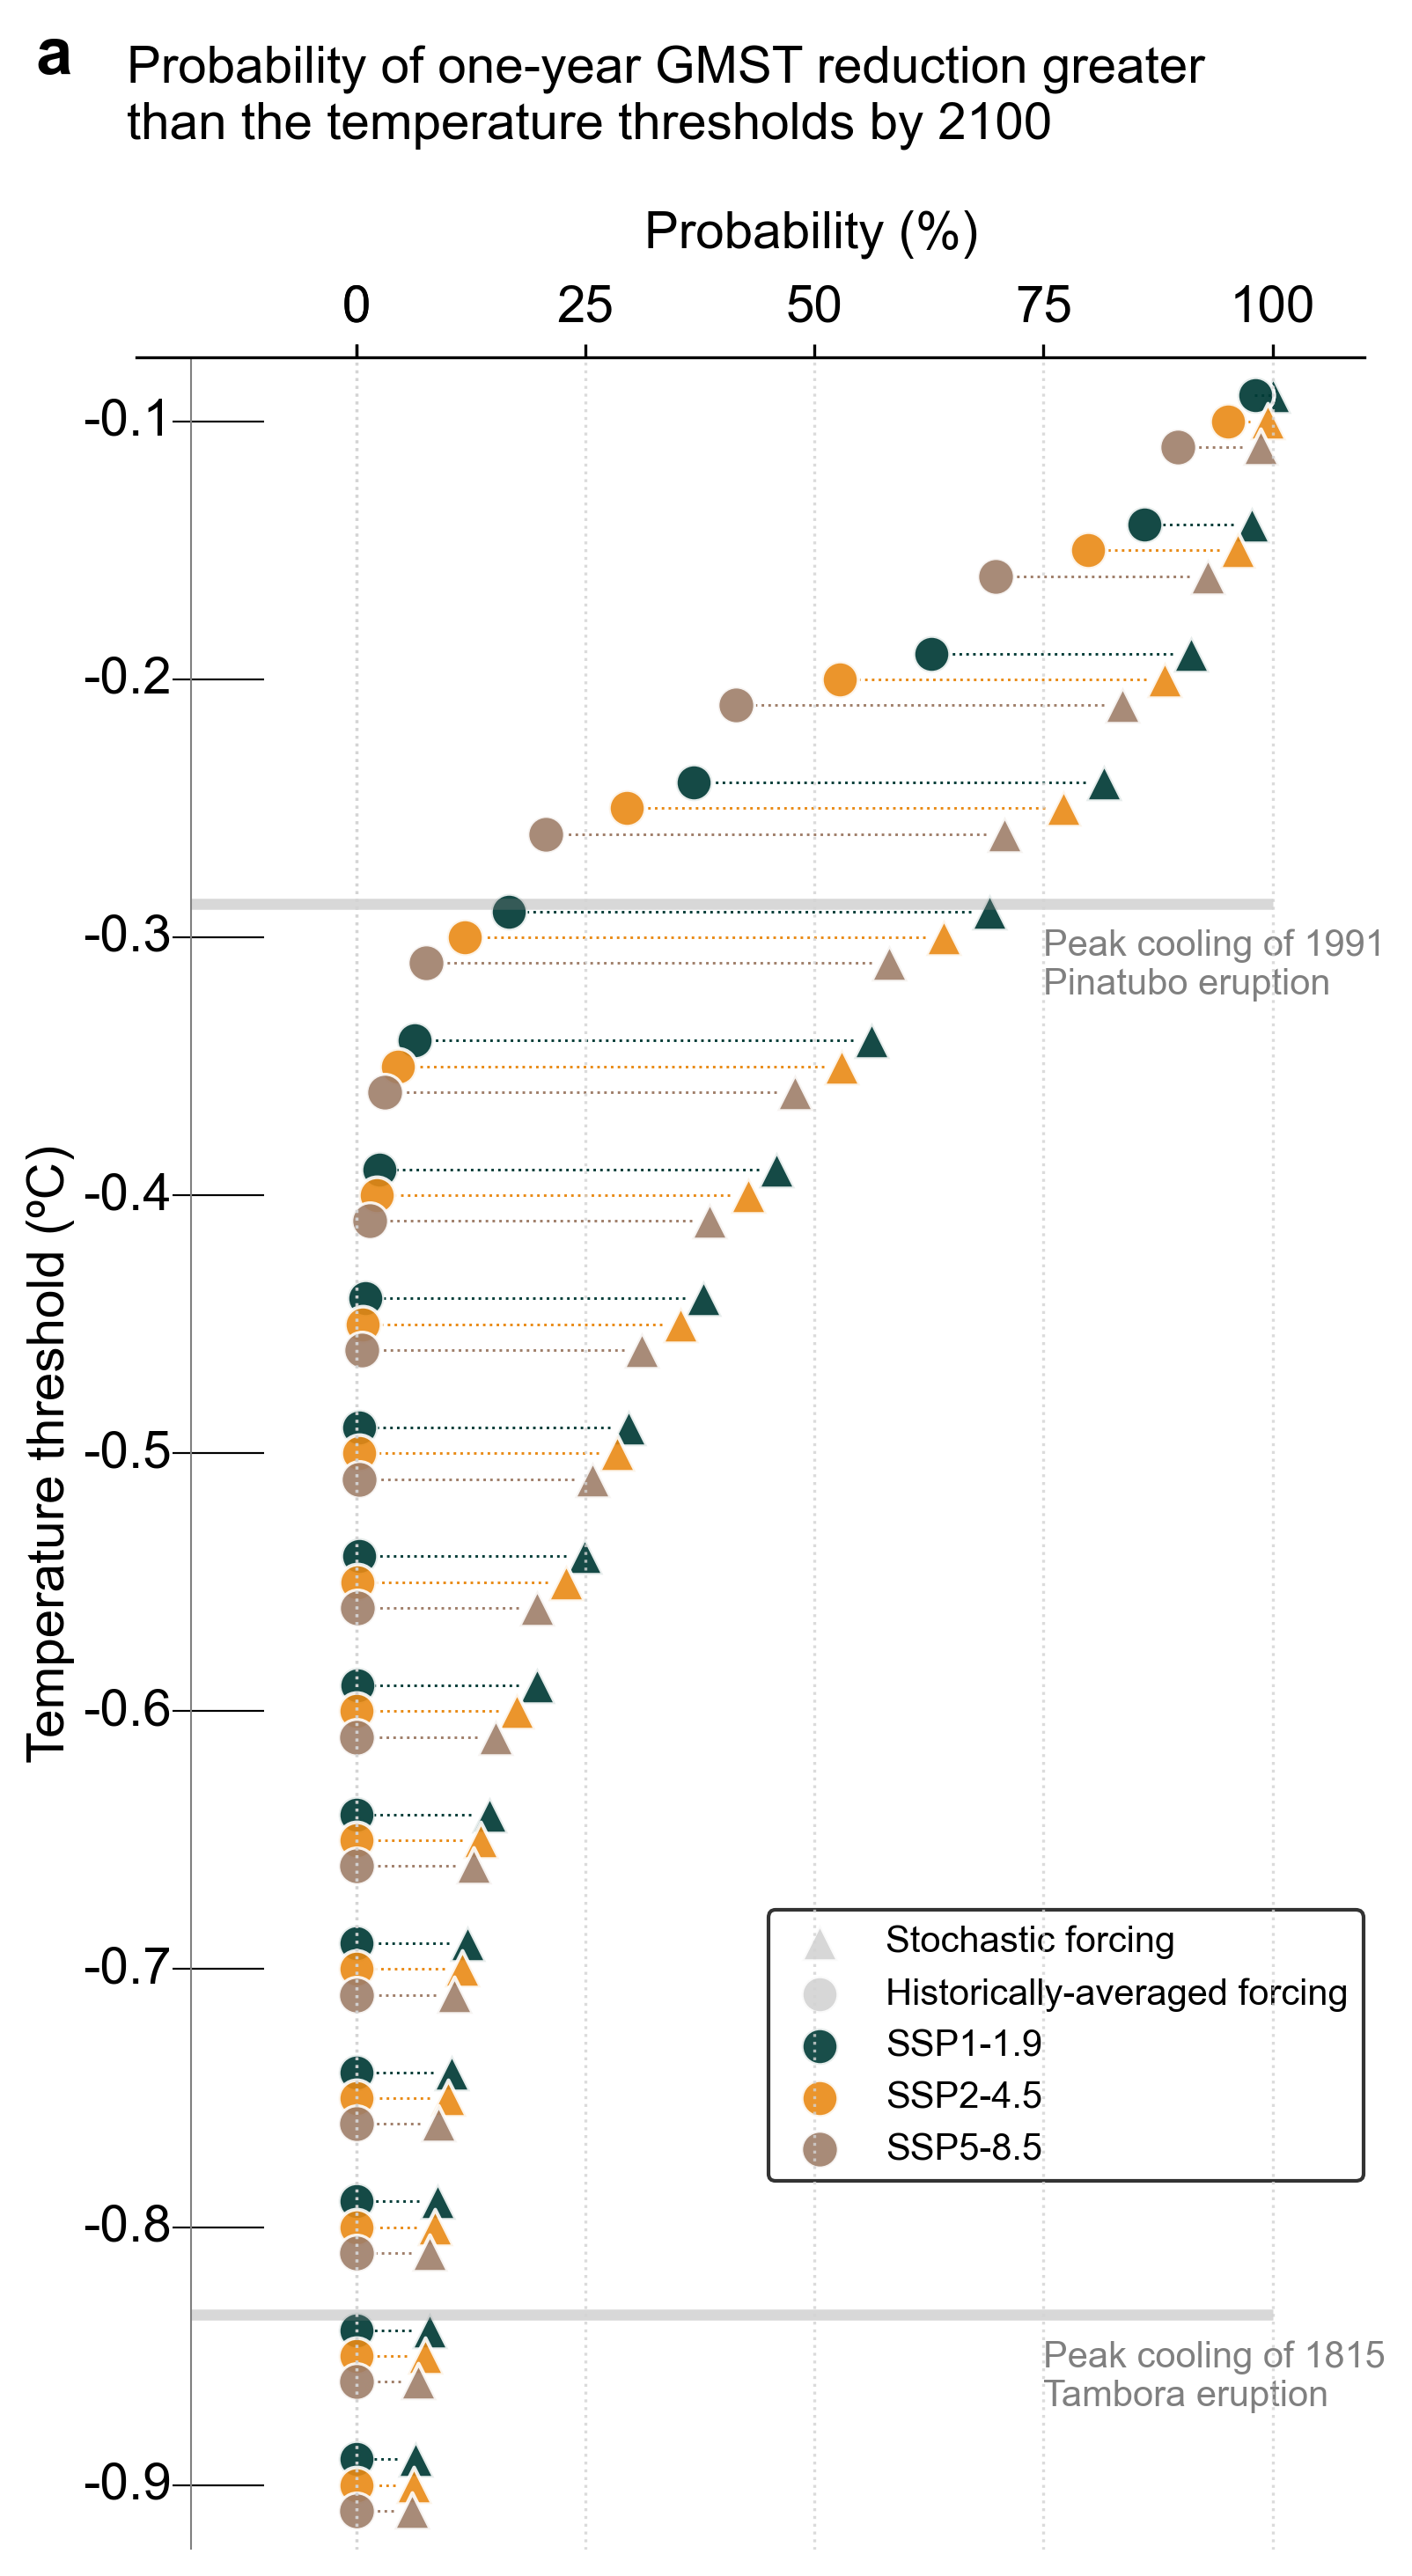

In [7]:
fig, ax1 = plt.subplots(figsize=(6, 11),dpi=300,frameon=False)
ax2 = ax1.twiny()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

ax2.spines['top'].set_visible(True)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

ax2.grid(axis='x', color = 'lightgrey', alpha = 0.8, ls = 'dotted')

color = ['#003B36', '#E98A15', '#9F7E69']

index = df_occurrence['Temperature']

cmap = mcolors.ListedColormap(palettable.scientific.sequential.LaJolla_10.mpl_colors)

# For legend grey markers
ax1.scatter(df_occurrence['SSP1-1.9'], index+0.035, color = 'lightgrey', 
            s = 100, label = 'Stochastic forcing', marker = '^', ec = 'white', alpha = 0.9)
ax1.scatter(df_occurrence['SSP1-1.9'], index+0.035, color = color[0], 
            s = 100, marker = '^', ec = 'white', alpha = 0.9)

#ssp119
ax1.hlines(index+0.035, df_occurrence['SSP1-1.9']-2, df_occurrence['HIST_ssp119']+2, 
           color = color[0], lw = 0.7, ls ='dotted')

ax1.scatter(df_occurrence['HIST_ssp119'], index+0.035, color = 'lightgrey',
            label = 'Historically-averaged forcing', s = 100, marker = 'o', ec = 'white', alpha = 0.9)
ax1.scatter(df_occurrence['HIST_ssp119'], index+0.035, color = color[0], 
            label = 'SSP1-1.9', s = 100, marker = 'o', ec = 'white', alpha = 0.9)

#ssp245
ax1.hlines(index+0.025, df_occurrence['SSP2-4.5']-2, df_occurrence['HIST_ssp245']+2, 
           color = color[1], lw = 0.7, ls ='dotted')
ax1.scatter(df_occurrence['SSP2-4.5'], index+0.025,
            color = color[1], marker = '^', ec = 'white', zorder = 11, s = 100, alpha = 0.9)
ax1.scatter(df_occurrence['HIST_ssp245'], index+0.025, label = 'SSP2-4.5',
            color = color[1], s = 100, ec = 'white', marker = 'o', zorder = 10, alpha = 0.9)

#ssp585
ax1.hlines(index+0.015, df_occurrence['SSP5-8.5']-2, df_occurrence['HIST_ssp585']+2, 
           color = color[2], lw = 0.7, ls ='dotted')
ax1.scatter(df_occurrence['SSP5-8.5'], index+0.015, 
            color = color[2], marker = '^', ec = 'white', zorder = 11, s = 100, alpha = 0.9)
ax1.scatter(df_occurrence['HIST_ssp585'], index+0.015, color = color[2], label = 'SSP5-8.5',
            s = 100, ec = 'white', marker = 'o', zorder = 10, lw = 0.8, alpha = 0.9)

ax1.text(-35,0.06,'a', fontsize=18, fontweight='bold')
ax1.text(-25,0.035,'Probability of one-year GMST reduction greater\nthan the temperature thresholds by 2100', fontsize=14)


# Peak cooling response of 1991 Pinatubo and 1815 Tambora
# -0.254 for first post eruption year - 1991 pinatubo
ax1.hlines(-0.287+0.025, -18, 100,color = 'grey', lw = 3, alpha = 0.3)
ax1.text(75, -0.287-0.01, 'Peak cooling of 1991\nPinatubo eruption', fontsize = 10, color = 'grey')

# -0.707 for first post eruption year - 1815 tambora
ax1.hlines(-0.834+0.025, -18, 100,color = 'grey', lw = 3, alpha = 0.3)
ax1.text(75, -0.834-0.01, 'Peak cooling of 1815\nTambora eruption', fontsize = 10, color = 'grey')


y = np.arange(-0.1, -0.91, -0.1)
x = np.linspace(0, 100, len(y))
for i, value in enumerate(y):
    if value <= -0.1:
        ax1.text(-25, value+0.025, f"{value:.1f}", ha="center", va="center", color="k", fontsize = 14)
        ax1.hlines(value+0.025, -20,-10, color = 'k', lw = 0.5)
        ax1.hlines(value+0.025, -20,-10, color = 'k', lw = 0.5)
        
ax1.vlines(-18, 0, -0.9, color='grey', lw=0.5)

ax1.set_ylim(-0.9,-0.05)
ax1.set_xlim(-24,110)
ax1.set_yticks([])


x_labels = [0,0,25,50,75,100]
ax1.set_xticklabels([])
ax1.set_xticks([])
ax2.set_xticklabels([])

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(x_labels)
ax2.set_xticklabels(x_labels, color='k', fontsize=14)
ax2.tick_params(axis='x', colors='k')
ax2.set_xlabel('Probability (%)', color='k', fontsize=14)
ax2.xaxis.set_label_coords(0.55, 1.05)


ax1.set_ylabel('Temperature threshold (ºC)', color = 'k', fontsize = 14)
ax1.yaxis.set_label_coords(-0.05,0.5)
ax1.legend(frameon=True, fontsize = 10, bbox_to_anchor=(0.5,0.3), labelcolor = 'k')

plt.savefig('Figure3a.pdf', format = 'pdf')

## Figure 3b (Probability of prolonged GMST reduction)

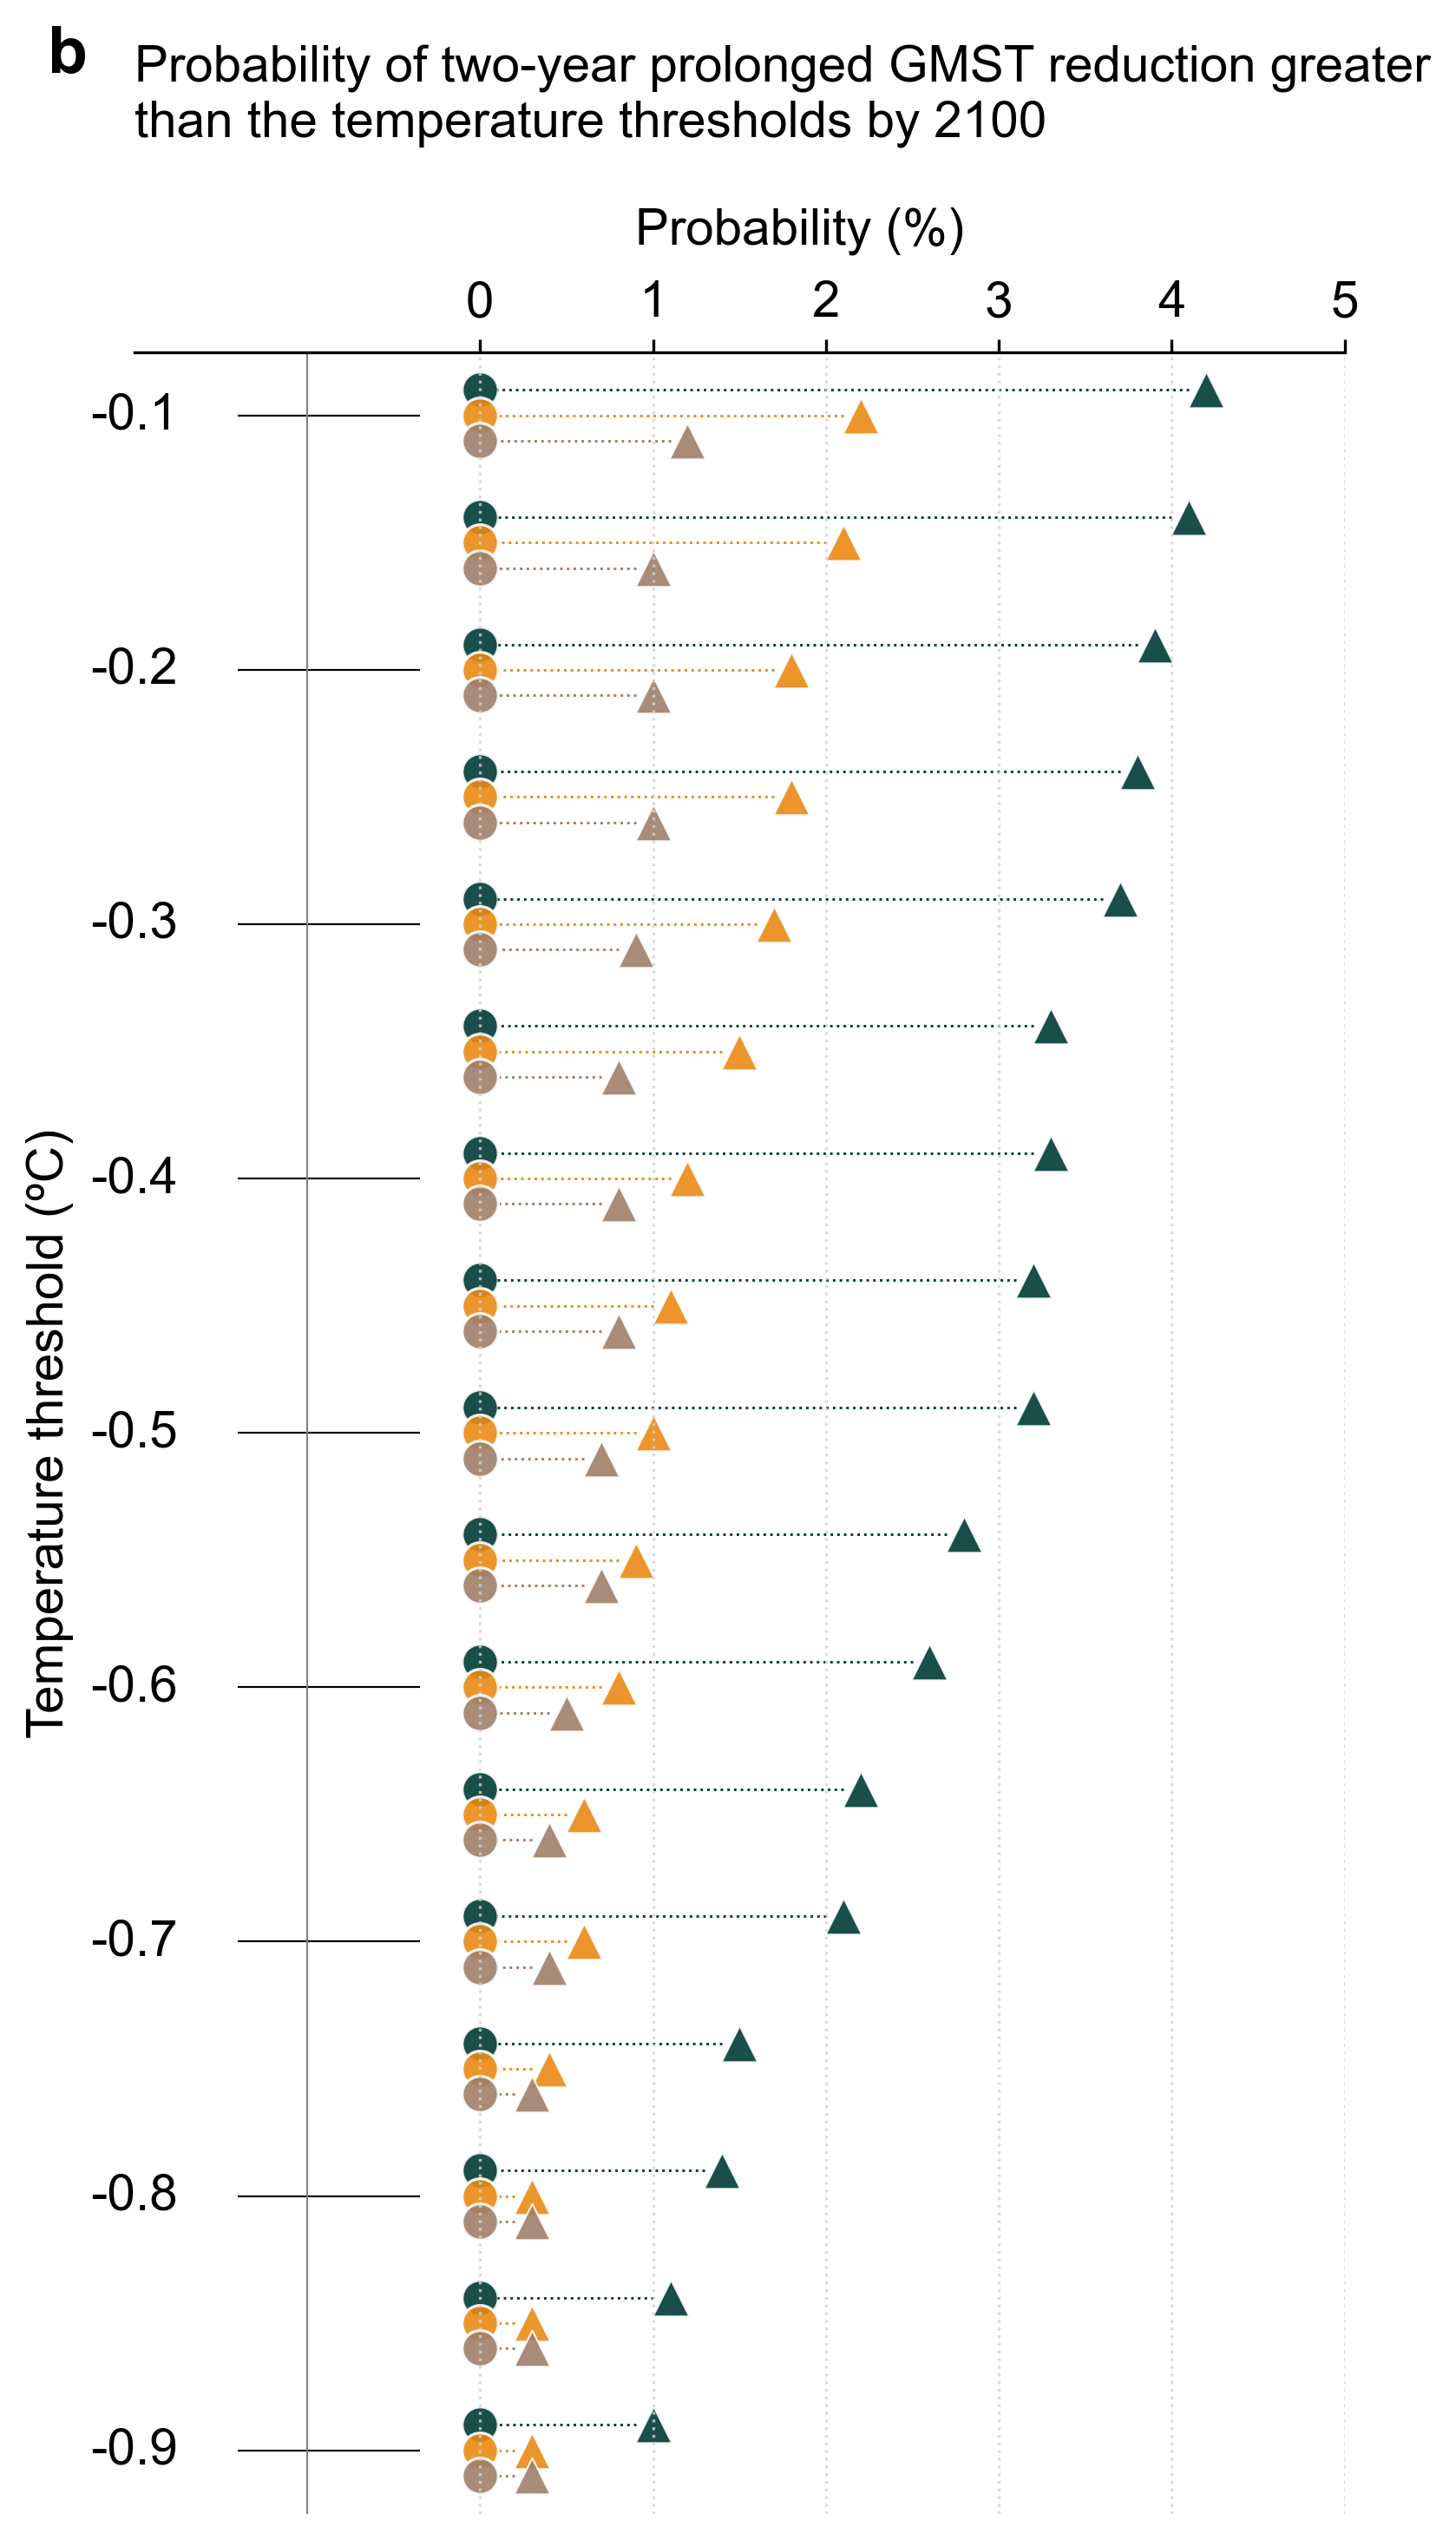

In [8]:
fig, ax1 = plt.subplots(figsize=(6, 11),dpi=300,frameon=False)
ax2 = ax1.twiny()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

ax2.spines['top'].set_visible(True)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

ax2.grid(axis='x', color = 'lightgrey', alpha = 0.8, ls = 'dotted')

index = df_prolonged['thresholds']

cmap = mcolors.ListedColormap(palettable.scientific.sequential.LaJolla_10.mpl_colors)

# Plot data
#ssp119
ax1.scatter(df_prolonged['Historically-averaged forcing'], index+0.035, 
            c = color[0], s = 100, ec = 'white', 
            marker = 'o', lw = 0.8, alpha = 0.9)

ax1.hlines(index+0.035, df_prolonged['Stochastic (SSP1-1.9)']-0.1, 
           df_prolonged['Historically-averaged forcing']+0.1, 
           color = color[0], ls ='dotted', lw = 0.7)

ax1.scatter(df_prolonged['Stochastic (SSP1-1.9)'], index+0.035, 
            c = color[0], lw = 0.5, s = 100,
            label = 'SSP1-1.9', marker = '^', ec = 'white', zorder = 11, alpha = 0.9)

#ssp245
ax1.hlines(index+0.025, df_prolonged['Stochastic (SSP2-4.5)']-0.1, 
           df_prolonged['Historically-averaged forcing']+0.1, 
           color = color[1], ls ='dotted',lw = 0.7)

ax1.scatter(df_prolonged['Historically-averaged forcing'], index+0.025, 
            c = color[1], s = 100, ec = 'white', 
            marker = 'o', zorder = 10, lw = 0.8, alpha = 0.9)

ax1.scatter(df_prolonged['Stochastic (SSP2-4.5)'], index+0.025, label = 'SSP2-4.5',
            color = color[1], marker = '^', ec = 'white', zorder = 11, s = 100, lw = 0.5, alpha = 0.9)

#ssp585
ax1.hlines(index+0.015, df_prolonged['Stochastic (SSP5-8.5)']-0.1, 
           df_prolonged['Historically-averaged forcing']+0.1, 
           color = color[2], ls ='dotted',lw = 0.7)

ax1.scatter(df_prolonged['Historically-averaged forcing'], index+0.015, 
            c = color[2], s = 100, ec = 'white', 
            marker = 'o', zorder = 10, lw = 0.8, alpha = 0.9)

ax1.scatter(df_prolonged['Stochastic (SSP5-8.5)'], index+0.015,  label = 'SSP5-8.5',
            color = color[2], marker = '^', ec = 'white', zorder = 11, s = 100, lw = 0.5, alpha = 0.9)

ax1.text(-2.5,0.06,'b', fontsize=18, fontweight='bold')
ax1.text(-2,0.035,'Probability of two-year prolonged GMST reduction greater\nthan the temperature thresholds by 2100', fontsize=14)

y = np.arange(-0.1, -0.91, -0.1)
x = np.linspace(0, 100, len(y))
for i, value in enumerate(y):
    if value <= -0.1:
        ax1.text(-2, value+0.025, f"{value:.1f}", ha="center", va="center", color="k", fontsize = 14)
        ax1.hlines(value+0.025, -0.35, -1.4, color = 'k', lw = 0.5)
        ax1.hlines(value+0.025, -0.35, -1.4, color = 'k', lw = 0.5)
        
ax1.vlines(-1, 0, -0.9, color='grey', lw=0.5)

ax1.set_ylim(-0.9,-0.05)
ax1.set_xlim(-2,5)
ax1.set_yticks([])

x_labels = [0,1,2,3,4,5]
ax1.set_xticklabels([])
ax1.set_xticks([])
ax2.set_xticklabels([])

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(x_labels)
ax2.set_xticklabels(x_labels, color='k', fontsize=14)
ax2.tick_params(axis='x', colors='k')
ax2.set_xlabel('Probability (%)', color='k', fontsize=14)
ax2.xaxis.set_label_coords(0.55, 1.05)

ax1.set_ylabel('Temperature threshold (ºC)', color = 'k', fontsize = 14)
ax1.yaxis.set_label_coords(-0.05,0.5)

plt.savefig('Figure3b.pdf', format = 'pdf')